In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

%matplotlib inline
plt.style.use('ggplot')

In [3]:
# load the data
dataset_directory="1. Dataset"
train_name = "train_split.csv"
test_name = "test_split.csv"
cuisine_name = "Cuisines.csv"

train = pd.read_csv(f"../{dataset_directory}/{train_name}")
test = pd.read_csv(f"../{dataset_directory}/{test_name}")
cuisine = pd.read_csv(f"../{dataset_directory}/{cuisine_name}", header = None)

In [4]:
train.drop(columns='Unnamed: 0', inplace = True)
test.drop(columns='Unnamed: 0', inplace = True)
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]

In [5]:
targets = np.unique(y_train)  # extract unique labels
targets = np.array(cuisine)
colors = sns.color_palette(n_colors=targets.size)
colors = sns.color_palette("Paired")
targets[:,0] -= np.ones(targets.shape[0])
targets[:,0] = targets[:,0].astype('int')

In [6]:
# keep a copy of unnormalize data 
X_train_unn = X_train

In [7]:
# normalize data 
X_train = StandardScaler().fit_transform(X_train)
# centred data
X_train_mean = X_train_unn.mean(axis=0).values
X_train_centred = X_train_unn - X_train_mean

In [8]:
# MDS
dist = DistanceMetric.get_metric('euclidean')
dist_X_train = dist.pairwise(X_train_centred)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=10, max_iter=100, metric = False, n_init = 10)
X_train_mds2d = mds.fit_transform(dist_X_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


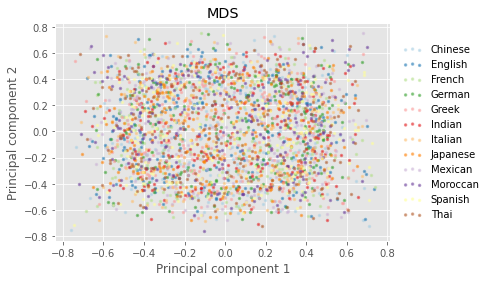

In [9]:
fig, ax = plt.subplots()

for color, target in zip(colors, targets):
    index = y_train[y_train['cuisine']==target[0]].index
    ax.scatter(X_train_mds2d[index,0], X_train_mds2d[index, 1], color=color, label=target[1], s=2, alpha=0.5, lw=2)

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set(title='MDS')
ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False)

In [10]:
normal_pca = PCA(n_components = 2, svd_solver = "full")
pc = normal_pca.fit_transform(X_train)

In [11]:
np.sum(normal_pca.explained_variance_ratio_)*100

1.6673219223431062

In [12]:
normal_pca = PCA(n_components = 0.95, svd_solver = "full")
pc = normal_pca.fit_transform(X_train)
normal_pca.components_.shape

(554, 709)

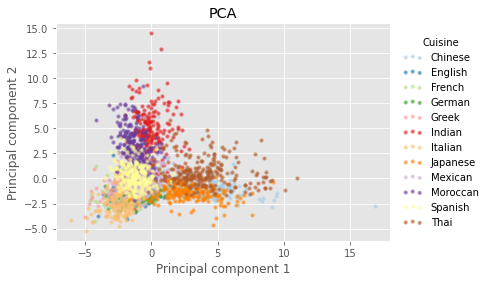

In [13]:
plt.style.use('ggplot')
normal_pca = PCA(n_components = 2, svd_solver = "full")
pc = normal_pca.fit_transform(X_train)


fig, ax = plt.subplots()

for color, target in zip(colors, targets):
    index = y_train[y_train['cuisine']==target[0]].index
    ax.scatter(pc[index,0], pc[index, 1], color=color, label=target[1], s=5, alpha=0.5, lw=2)

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set(title='PCA')
ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False, title = "Cuisine", )
fig.savefig('PCA.pdf',  bbox_inches='tight')

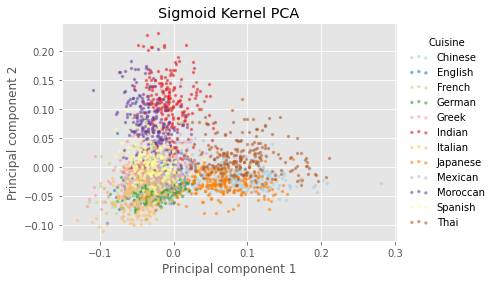

In [14]:
# kernel PCA
kernels = ['poly', 'rbf', 'cosine', 'sigmoid']
kernel = kernels[3:4]
fig, ax = plt.subplots()

for ii, kernel in enumerate(kernel):
    X_train_kpca2d = KernelPCA(n_components=2, kernel=kernel, fit_inverse_transform= True).fit_transform(X_train)
    cur_ax = ax
    for color, target in zip(colors, targets):
        index = y_train[y_train['cuisine']==target[0]].index
        cur_ax.scatter(X_train_kpca2d[index,0], X_train_kpca2d[index, 1], color=color, label=target[1], s=2, alpha=0.5, lw=2)
    #cur_ax.set(title='{} kernel'.format(kernel))
    #cur_ax.legend().set_visible(False)

ax.set_ylabel('Principal component 2')
ax.set_ylabel('Principal component 2')

ax.set_xlabel('Principal component 1')
ax.set_xlabel('Principal component 1')
ax.set_title("Sigmoid Kernel PCA")
ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False, title="Cuisine");

fig.savefig('sigmoid_PCA.pdf', bbox_inches='tight')

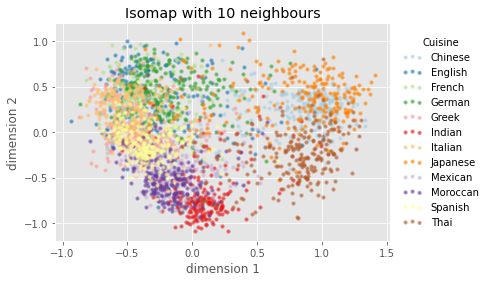

In [15]:
#Isomap
n_neighbours_arr = [ 10]
fig, ax = plt.subplots()

for ii, n_neighbours in enumerate(n_neighbours_arr):
    ismp = Isomap(n_components=2, n_neighbors=n_neighbours, metric = "cosine")
    X_ismp_2d = ismp.fit_transform(X_train_unn)
    
    cur_ax = ax
    for color, target in zip(colors, targets):
        index = y_train[y_train['cuisine']==target[0]].index
        cur_ax.scatter(X_ismp_2d[index,0], X_ismp_2d[index, 1], color=color, label=target[1], s=5, alpha=0.5, lw=2)
    #cur_ax.set(title='{} neighbours'.format(n_neighbours))
    #cur_ax.legend().set_visible(False)

ax.set_ylabel('dimension 2')


ax.set_xlabel('dimension 1')
ax.set_title("Isomap with 10 neighbours")

plt.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3,frameon = False, title = "Cuisine");
plt.savefig("Isomap.pdf", bbox_inches='tight')

c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


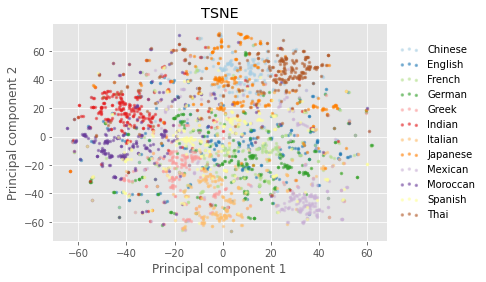

In [16]:
# TSNE
X_embedded = TSNE(n_components=2, metric = "cosine").fit_transform(X_train)

fig, ax = plt.subplots()

for color, target in zip(colors, targets):
    index = y_train[y_train['cuisine']==target[0]].index
    ax.scatter(X_embedded[index,0], X_embedded[index, 1], color=color, label=target[1], s=2, alpha=0.5, lw=2)

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set(title='TSNE')
ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False)

c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


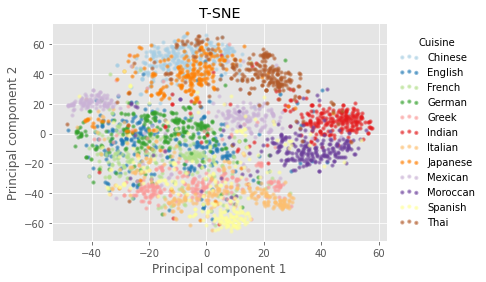

In [17]:
# TSNE using centred data
X_embedded = TSNE(n_components=2, metric = "cosine").fit_transform(X_train_centred)

fig, ax = plt.subplots()

for color, target in zip(colors, targets):
    index = y_train[y_train['cuisine']==target[0]].index
    ax.scatter(X_embedded[index,0], X_embedded[index, 1], color=color, label=target[1], s=5, alpha=0.5, lw=2)

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set(title='T-SNE')
ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False, title = "Cuisine")
fig.savefig("TSNE.pdf", bbox_inches='tight')